Predicted values:  [19.88 44.43 34.78]
Real values:	  [12.40492474 42.64192391 32.61398476]
Trained W:	  6.84
Trained b:	  26.61


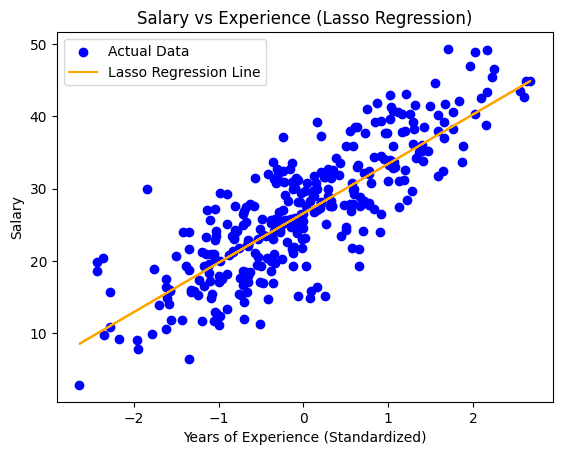

In [8]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Lasso Regression
class LassoRegression():
	def __init__(self, learning_rate, iterations, l1_penalty):
		self.learning_rate = learning_rate
		self.iterations = iterations
		self.l1_penalty = l1_penalty

	# Function for model training
	def fit(self, X, Y):
		# no_of_training_examples, no_of_features
		self.m, self.n = X.shape
		# weight initialization
		self.W = np.zeros(self.n)
		self.b = 0
		self.X = X
		self.Y = Y
		# gradient descent learning
		for i in range(self.iterations):
			self.update_weights()
		return self

	# Helper function to update weights in gradient descent
	def update_weights(self):
		Y_pred = self.predict(self.X)
		# calculate gradients
		dW = np.zeros(self.n)
		for j in range(self.n):
			if self.W[j] > 0:
				dW[j] = (-2 * (self.X[:, j]).dot(self.Y - Y_pred) +
						self.l1_penalty) / self.m
			else:
				dW[j] = (-2 * (self.X[:, j]).dot(self.Y - Y_pred) -
						self.l1_penalty) / self.m

		db = -2 * np.sum(self.Y - Y_pred) / self.m

		# update weights
		self.W = self.W - self.learning_rate * dW
		self.b = self.b - self.learning_rate * db
		return self

	# Hypothetical function h(x)
	def predict(self, X):
		return X.dot(self.W) + self.b
def main():
	# Importing dataset
	df = pd.read_csv("Experience-Salary.csv")
	X = df.iloc[:, :-1].values
	Y = df.iloc[:, 1].values

	# Standardize features
	scaler = StandardScaler()
	X = scaler.fit_transform(X)

	# Splitting dataset into train and test set
	X_train, X_test, Y_train, Y_test = train_test_split(
		X, Y, test_size=1/3, random_state=0)

	# Model training
	model = LassoRegression(
		iterations=1000, learning_rate=0.01, l1_penalty=500)
	model.fit(X_train, Y_train)

	# Prediction on test set
	Y_pred = model.predict(X_test)

	print("Predicted values: ", np.round(Y_pred[:3], 2))
	print("Real values:	 ", Y_test[:3])
	print("Trained W:	 ", round(model.W[0], 2))
	print("Trained b:	 ", round(model.b, 2))

	# Visualization on test set
	plt.scatter(X_test, Y_test, color='blue', label='Actual Data')
	plt.plot(X_test, Y_pred, color='orange', label='Lasso Regression Line')
	plt.title('Salary vs Experience (Lasso Regression)')
	plt.xlabel('Years of Experience (Standardized)')
	plt.ylabel('Salary')
	plt.legend()
	plt.show()


if __name__ == "__main__":
	main()

